In [76]:
# Import the libraries / packages

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
# Import the data

df = pd.read_csv("Classified Data", index_col=0)

In [20]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [21]:
# Import a scaler to scale the variable/features to be in the same scale

from sklearn.preprocessing import StandardScaler

In [22]:
# Initialize the scaler

scaler = StandardScaler()

In [23]:
# Scale the features i.e feature matrix

scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

In [30]:
# transform the scaled features

scaled_feats = scaler.fit_transform(df.drop("TARGET CLASS", axis=1)) # to get an array of values

In [29]:
scaled_feats

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [36]:
# Create a new df with the scaled data using the df cols names as the cols. 

df_feat = pd.DataFrame(scaled_feats, columns=df.columns[:-1])

# Divide the data into Feature Matrix (X) and Target Vector (y)

In [42]:
# X is all the features while y is what to predict

X = df_feat.values
y = df["TARGET CLASS"].values

In [39]:
df_feat.values

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

## Split the data into training and testing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
# initialize the Neighbors Classifier 

nnmodel = KNeighborsClassifier()

In [48]:
# train the model
nnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# Make predictions

pred = nnmodel.predict(X_test)

In [55]:
pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], d

In [57]:
# Check the performance of the model 

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       161
           1       0.90      0.92      0.91       139

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [63]:
accuracy_score(y_test, pred)

0.9166666666666666

# Use the Elbow method to choosing the right k-values

In [68]:
# defined a functin that computes for the best k value

error_rate = []

for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error_rate')

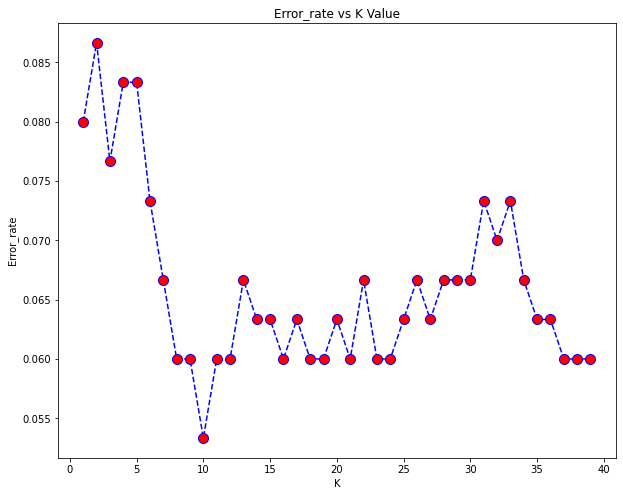

In [75]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 40), error_rate, color="blue", linestyle='dashed', 
         marker="o", markerfacecolor="red", markersize=10)
plt.title("Error_rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error_rate")

In [69]:
error_rate

[0.08,
 0.08666666666666667,
 0.07666666666666666,
 0.08333333333333333,
 0.08333333333333333,
 0.07333333333333333,
 0.06666666666666667,
 0.06,
 0.06,
 0.05333333333333334,
 0.06,
 0.06,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.06,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.06,
 0.06,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.07333333333333333,
 0.07,
 0.07333333333333333,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06,
 0.06]

In [78]:
# for k = 1

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
prdiction = knn1.predict(X_test)

In [79]:
# evaluation 
confusion_matrix(y_test, prdiction)

array([[147,  14],
       [ 10, 129]], dtype=int64)

In [80]:
accuracy_score(y_test, prdiction)

0.92

In [82]:
print(classification_report(y_test, prdiction))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       161
           1       0.90      0.93      0.91       139

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [84]:
# at k = 24

nnkn = KNeighborsClassifier(n_neighbors=24)
nnkn.fit(X_train, y_train)
kpred = nnkn.predict(X_test)

In [88]:
print(classification_report(y_test, kpred))
accuracy_score(y_test, kpred)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       161
           1       0.91      0.96      0.94       139

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



0.94